In [1]:
import math
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats            
import statsmodels.api as statsmod 

## <span style="color:blue"> 1. Textual Analysis and FOMC Minutes </span> 

Goal: (a) to measure and quantify central bankers' positive and negative sentiment during FOMC meetings, and then (b) examine how these two sentiment measures evolve over time on a yearly basis.

$\mbox{NegativeScore}_{20200315} = \frac{\mbox{Count of Negative Words}_{20200315}}{\mbox{Count of Total Words}_{20200315}}\times 100$ 


$\mbox{PositiveScore}_{20200315} = \frac{\mbox{Count of Positive Words}_{20200315}}{\mbox{Count of Total Words}_{20200315}}\times 100$

In [2]:
# Step 1. Import the 20200315 meeting file, '1.6_LM_negative.txt', '1.6_LM_positive.txt', and 'StopWords_Generic.txt'
def Input(filename):        
    f = open(filename, 'r')      
    lines = f.readlines()        
    lines = [l.strip() for l in lines]    
    f.close()
    return lines

In [3]:
pos = Input('1.6_LM_positive.txt')
neg = Input('1.6_LM_negative.txt')
stop = Input('StopWords_Generic.txt')

In [4]:
# Step 2. Clean up the text file & score calculation
txt = Input('20200315.txt')
#remove empty strings
words = []
for i in range(len(txt)):
    if txt[i] != '':
        words.append(txt[i])

clean = []
for j in range(len(words)):
    a = words[j].split()
    for q in range(len(a)):
        clean.append(a[q].strip(".,-()*/:"))

#drop stop words
final = [element for element in clean if element.upper() not in stop]
wordcount = len(final)

neglst = [x for x in final if x.upper() in neg]
poslst = [y for y in final if y.upper() in pos]
neg_score = len(neglst)/wordcount*100
pos_score = len(poslst)/wordcount*100
print(neg_score,pos_score)

if neg_score > pos_score:
    sentiment = 'negative'
else:
    sentiment = 'positive'


4.61634435433562 1.2320648783530879


In [5]:
print("During this FOMC meeting, central bankers and officials expressed slightly more {} sentiment. To be specific, {} of {} words (or {:2.2f}%) are related to positive sentiment, while {:2.2f}% are related to negative sentiment.".format(sentiment,len(poslst),wordcount,pos_score,neg_score))

During this FOMC meeting, central bankers and officials expressed slightly more negative sentiment. To be specific, 79 of 6412 words (or 1.23%) are related to positive sentiment, while 4.62% are related to negative sentiment.


Repeat steps above for all the 256 FOMC meeting minutes files, and obtain a dataset containing 256 negative scores ("NEGSCORE") and a dataset of 256 positive scores ("POSSCORE"). 

In [6]:
TITLE = ['19900207.txt','19900327.txt',	'19900515.txt',	'19900703.txt',	'19900821.txt',	'19901002.txt',	'19901113.txt',	'19901218.txt',	'19910206.txt',	'19910326.txt',	'19910514.txt',	'19910703.txt',	'19910820.txt',	'19911001.txt',	'19911105.txt',	'19911217.txt',	'19920205.txt',	'19920331.txt',	'19920519.txt',	'19920701.txt',	'19920818.txt',	'19921006.txt',	'19921117.txt',	'19921222.txt',	'19930203.txt',	'19930323.txt',	'19930518.txt',	'19930707.txt',	'19930817.txt',	'19930921.txt',	'19931116.txt',	'19931221.txt',	'19940204.txt',	'19940322.txt',	'19940517.txt',	'19940706.txt',	'19940816.txt',	'19940927.txt',	'19941115.txt',	'19941220.txt',	'19950201.txt',	'19950328.txt',	'19950523.txt',	'19950706.txt',	'19950822.txt',	'19950926.txt',	'19951115.txt',	'19951219.txt',	'19960130.txt',	'19960326.txt',	'19960521.txt',	'19960702.txt',	'19960820.txt',	'19960924.txt',	'19961113.txt',	'19961217.txt',	'19970204.txt',	'19970325.txt',	'19970520.txt',	'19970701.txt',	'19970819.txt',	'19970930.txt',	'19971112.txt',	'19971216.txt',	'19980203.txt',	'19980331.txt',	'19980519.txt',	'19980630.txt',	'19980818.txt',	'19980929.txt',	'19981117.txt',	'19981222.txt',	'19990202.txt',	'19990330.txt',	'19990518.txt',	'19990629.txt',	'19990824.txt',	'19991005.txt',	'19991116.txt',	'19991221.txt',	'20000202.txt',	'20000321.txt',	'20000516.txt',	'20000628.txt',	'20000822.txt',	'20001003.txt',	'20001115.txt',	'20001219.txt',	'20010131.txt',	'20010320.txt',	'20010515.txt',	'20010627.txt',	'20010821.txt',	'20011002.txt',	'20011106.txt',	'20011211.txt',	'20020130.txt',	'20020319.txt',	'20020507.txt',	'20020626.txt',	'20020813.txt',	'20020924.txt',	'20021106.txt',	'20021210.txt',	'20030129.txt',	'20030318.txt',	'20030506.txt',	'20030625.txt',	'20030812.txt',	'20030916.txt',	'20031028.txt',	'20031209.txt',	'20040128.txt',	'20040316.txt',	'20040504.txt',	'20040630.txt',	'20040810.txt',	'20040921.txt',	'20041110.txt',	'20041214.txt',	'20050202.txt',	'20050322.txt',	'20050503.txt',	'20050630.txt',	'20050809.txt',	'20050920.txt',	'20051101.txt',	'20051213.txt',	'20060131.txt',	'20060328.txt',	'20060510.txt',	'20060629.txt',	'20060808.txt',	'20060920.txt',	'20061025.txt',	'20061212.txt',	'20070131.txt',	'20070321.txt',	'20070509.txt',	'20070628.txt',	'20070807.txt',	'20070918.txt',	'20071031.txt',	'20071211.txt',	'20080130.txt',	'20080318.txt',	'20080430.txt',	'20080625.txt',	'20080805.txt',	'20080916.txt',	'20081029.txt',	'20081216.txt',	'20090128.txt',	'20090318.txt',	'20090429.txt',	'20090624.txt',	'20090812.txt',	'20090923.txt',	'20091104.txt',	'20091216.txt',	'20100127.txt',	'20100316.txt',	'20100428.txt',	'20100623.txt',	'20100810.txt',	'20100921.txt',	'20101103.txt',	'20101214.txt',	'20110126.txt',	'20110315.txt',	'20110427.txt',	'20110622.txt',	'20110809.txt',	'20110921.txt',	'20111102.txt',	'20111213.txt',	'20120125.txt',	'20120313.txt',	'20120425.txt',	'20120620.txt',	'20120801.txt',	'20120913.txt',	'20121024.txt',	'20121212.txt',	'20130130.txt',	'20130320.txt',	'20130501.txt',	'20130619.txt',	'20130731.txt',	'20130918.txt',	'20131030.txt',	'20131218.txt',	'20140129.txt',	'20140319.txt',	'20140430.txt',	'20140618.txt',	'20140730.txt',	'20140917.txt',	'20141029.txt',	'20141217.txt',	'20150128.txt',	'20150318.txt',	'20150429.txt',	'20150617.txt',	'20150729.txt',	'20150917.txt',	'20151028.txt',	'20151216.txt',	'20160127.txt',	'20160316.txt',	'20160427.txt',	'20160615.txt',	'20160727.txt',	'20160921.txt',	'20161102.txt',	'20161214.txt',	'20170201.txt',	'20170315.txt',	'20170503.txt',	'20170614.txt',	'20170726.txt',	'20170920.txt',	'20171101.txt',	'20171213.txt',	'20180131.txt',	'20180321.txt',	'20180502.txt',	'20180613.txt',	'20180801.txt',	'20180926.txt',	'20181108.txt',	'20181219.txt',	'20190130.txt',	'20190320.txt',	'20190501.txt',	'20190619.txt',	'20190731.txt',	'20190918.txt',	'20191030.txt',	'20191211.txt',	'20200129.txt',	'20200315.txt',	'20200429.txt',	'20200610.txt',	'20200729.txt',	'20200916.txt',	'20201105.txt',	'20201216.txt', '20210127.txt', '20210317.txt', '20210428.txt', '20210616.txt', '20210728.txt', '20210922.txt', '20211103.txt', '20211215.txt']

In [7]:
NEGSCORE = []
POSSCORE = []
for i in range(len(TITLE)):
    f = open(TITLE[i], 'r', encoding='utf-8')    
    txt = f.readlines()        
    txt = [l.strip() for l in txt] 

    words = []
    for i in range(len(txt)):
        if txt[i] != '':
            words.append(txt[i])
            
    clean = []
    for j in range(len(words)):
        a = words[j].split()
        for q in range(len(a)):
            clean.append(a[q].strip(".,-()*/:"))

    final = [element for element in clean if element.upper() not in stop]
    wordcount = len(final)

    neglst = [x for x in final if x.upper() in neg]
    poslst = [y for y in final if y.upper() in pos]
    neg_score = len(neglst)/wordcount*100
    pos_score = len(poslst)/wordcount*100
    
    NEGSCORE.append(neg_score)
    POSSCORE.append(pos_score)


Use the two datasets generated above to obtain $average$ positive and negative scores by $year$. 

In [8]:
years = [x[0:4] for x in TITLE]
neg_tuples = list(zip(years,NEGSCORE))
neg_df = pd.DataFrame(neg_tuples, columns=['years','NEGSCORE'])
neg_avg = neg_df.groupby('years').mean()
neglst = neg_avg['NEGSCORE'].tolist()

pos_tuples = list(zip(years,POSSCORE))
pos_df = pd.DataFrame(pos_tuples, columns=['years','POSSCORE'])
pos_avg = pos_df.groupby('years').mean()
poslst = pos_avg['POSSCORE'].tolist()

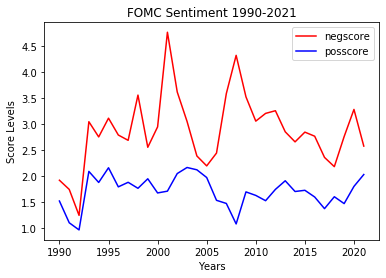

In [9]:
yearlst = list(range(1990,2022))
plt.plot(yearlst, neglst, color = 'red', label = 'negscore')
plt.plot(yearlst, poslst, color = 'blue', label = 'posscore')
plt.xlabel('Years')
plt.ylabel('Score Levels')
plt.title('FOMC Sentiment 1990-2021')
plt.legend()
plt.show()

## <span style="color:blue"> 2. Regression Analysis </span> 

I want to examine which observables (asset prices, VIX, consumer sentiment) may be more sensitive to Central Bank's sentiment.

In [10]:
def reg_m(y, x):
    X = np.hstack((np.ones((len(x),1)), x))     
    results = statsmod.OLS(y, X).fit()                
    return results

In [11]:
q2 = np.genfromtxt("part2_data.csv", delimiter=',')
q2_n = np.array(["year", "neg", "pos", "comm", "gold", "oil", "World", "NA", "Europe", "EM", "Asia", "USA", "Japan", "UK", "Germany", "VIX", "Consumer"])
cor = np.corrcoef(q2[1:,1:3].T)[0,1]
print(cor)

0.19094623557718768


Run the following 5 contemperanous regressions: 
1. NEGSCORE = a + b * POSSCORE + e       
2. Commodity returns = a + b1 * NEGSCORE + b2 * POSSCORE + e
3. USA stock returns = a + b1 * NEGSCORE + b2 * POSSCORE + e
4. Changes in VIX = a + b1 * NEGSCORE + b2 * POSSCORE + e
5. Changes in consumer sentiment = a + b1 * NEGSCORE + b2 * POSSCORE + e

In [12]:
#1
neg = q2[1:,1]
pos = q2[1:,2]
xy = np.vstack((pos,neg))
stats.linregress(xy)

LinregressResult(slope=0.435974370076173, intercept=2.1335225905397617, rvalue=0.1909462355771877, pvalue=0.2951683915909264, stderr=0.4091890469236198)

Note: in the following summary statistics x1 coefficient is for POSSCORE and x2 coefficient is for NEGSCORE.

In [13]:
comm = q2[1:,3]
exo = xy.T
exos = statsmod.tools.tools.add_constant(exo)
results = statsmod.OLS(comm, exos).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     4.403
Date:                Sun, 19 Jun 2022   Prob (F-statistic):             0.0214
Time:                        12:14:40   Log-Likelihood:                 2.3608
No. Observations:                  32   AIC:                             1.278
Df Residuals:                      29   BIC:                             5.676
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0734      0.275     -0.267      0.7

In [14]:
USA = q2[1:,q2_n == 'USA']
exo = xy.T
exos = statsmod.tools.tools.add_constant(exo)
results = statsmod.OLS(USA, exos).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     4.303
Date:                Sun, 19 Jun 2022   Prob (F-statistic):             0.0231
Time:                        12:14:43   Log-Likelihood:                 15.738
No. Observations:                  32   AIC:                            -25.48
Df Residuals:                      29   BIC:                            -21.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0691      0.181      0.381      0.7

In [15]:
VIX = q2[1:,q2_n == 'VIX']
exo = xy.T
exos = statsmod.tools.tools.add_constant(exo)
results = statsmod.OLS(VIX, exos).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     4.773
Date:                Sun, 19 Jun 2022   Prob (F-statistic):             0.0162
Time:                        12:14:45   Log-Likelihood:                -2.5728
No. Observations:                  32   AIC:                             11.15
Df Residuals:                      29   BIC:                             15.54
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0446      0.321     -0.139      0.8

In [16]:
Consumer = q2[1:,q2_n == 'Consumer']
exo = xy.T
exos = statsmod.tools.tools.add_constant(exo)
results = statsmod.OLS(Consumer, exos).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     4.953
Date:                Sun, 19 Jun 2022   Prob (F-statistic):             0.0141
Time:                        12:14:45   Log-Likelihood:                 38.259
No. Observations:                  32   AIC:                            -70.52
Df Residuals:                      29   BIC:                            -66.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0648      0.090     -0.722      0.4

In [17]:
oil = q2[1:,q2_n == 'oil']
exo = xy.T
exos = statsmod.tools.tools.add_constant(exo)
results = statsmod.OLS(oil, exos).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     3.254
Date:                Sun, 19 Jun 2022   Prob (F-statistic):             0.0531
Time:                        12:14:46   Log-Likelihood:                -13.534
No. Observations:                  32   AIC:                             33.07
Df Residuals:                      29   BIC:                             37.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1647      0.452     -0.364      0.7

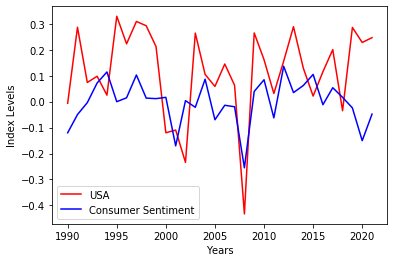

In [18]:
USA = q2[1:,q2_n == 'USA']
USAlst = USA.tolist()
CSlst = Consumer.tolist()
plt.plot(yearlst, USAlst, color = 'red', label = 'USA')
plt.plot(yearlst, CSlst, color = 'blue', label = 'Consumer Sentiment')
plt.xlabel('Years')
plt.ylabel('Index Levels')
plt.legend()
plt.show()

The regression results are:
NEGSCORE = 2.13 + 0.44 * POSSCORE + e

Commodity returns = -0.0734 -0.1472 * NEGSCORE + 0.3124 * POSSCORE + e

USA stock returns = 0.0691 -0.0992 * NEGSCORE + 0.1940 * POSSCORE + e

Changes in VIX = -0.0446 + 0.2030 * NEGSCORE -0.2996 * POSSCORE + e

Changes in consumer sentiment = -0.0648 - 0.0471 * NEGSCORE +0.1164 * POSSCORE + e

The first regression studies the relationship between POSSCORE and NEGSCORE. A positive coefficient and positive intercept suggests over the 1990-2021 period, the FOMC is pessimistic about the market most of the time. r value is 0.19 which means changes in POSSCORE explain little of changes in NEGSCORE. It makes sense because each FOMC meeting is independent and only addresses most recent conditions, the previous meeting may gives a little hint but the board does not fully rely on its previous decisions when making new ones. 

In the multivariate regressions, we are curious about which observables (asset prices, VIX, consumer sentiment) are more sensitive to Central Bank's sentiment. Except for the coefficient for POSSCORE in the VIX regression, all the other coefficients are statistically significant. I looked at the magnitude and the direction of these coefficients and found that the absolute values of POSSCORE coefficients are all larger than NEGSCORE coefficients, therefore the observables are more responsive to positive sentiment. Commodities is the most responsive to positive sentiment and VIX is the most responsive to negative sentiment. Directionally, coefficients for POSSCORE are positive with the exception of VIX, because VIX tracks volatility and is also known as a "fear index", and when the market is falling, volatility value, investors’ fear, and VIX values all move up. 

I'm interested in the relationship between Consumer Sentiment and USA stock returns. It is generally believed that when Consumer Sentiment goes up people are likely to spend more money and invest more, and stock prices is also an important indicator that affects Consumer Sentiment. Hence, I assumed that we will see significant co-movement if we plot them together. The graph shows that the two indicies mostly move in the same direction in good times and in bad times. However, in the period between 2018 and 2020, USA stock returns increased significantly while consumer sentiment dropped. Researchers believed that increasing inflation expectations combined with dismal wage growth contributed to this downward trend. 

Source: https://www.marketwatch.com/story/lack-of-wage-growth-brings-down-consumer-sentiment-in-october-2018-10-26

Additionally, I looked at oil's sensitivity to POSSCORE and NEGSCORE. My hypothesis is that the coefficient for POSSCORE would be larger in absolute value because oil demand goes up when the economy is doing well, but when the economy is not doing well exporters and OPEC will quickly respond to it by cutting production so that oil price does not drop freely. The regresssion shows that coefficient of POSSCORE is indeed larger yet the two coefficients are not statistically significant, this could be attributed to the cartels' influence over prices, and the various geopolitical events that are completely uncorrelated to the economy. 